In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
commodities = pd.read_csv('NATIONAL WHOLESALE PRICE OF SOME SELECTED COMMODITIES.csv', encoding='latin1')
commodities.head()

,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
0,2008,JANUARY,MAIZE,100,13.694
1,2008,FEBRUARY,MAIZE,100,13.066
2,2008,MARCH,MAIZE,100,14.043
3,2008,APRIL,MAIZE,100,14.947
4,2008,MAY,MAIZE,100,14.808


In [4]:
commodities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                720 non-null    int64  
 1   MONTH               720 non-null    object 
 2   COMMODITY           720 non-null    object 
 3   WEIGHT, KG PER BAG  720 non-null    int64  
 4    PRICE, ¢ GH        720 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 28.2+ KB


The data does not contain any null values and all the columns are in their right data types


In [5]:
commodities.columns

Index(['YEAR', 'MONTH', 'COMMODITY', 'WEIGHT, KG PER BAG', ' PRICE, ¢ GH'], dtype='object')

The PRICE, ¢ GH has a whitespace so we will correct the error

In [6]:

commodities.columns = ['YEAR', 'MONTH', 'COMMODITY', 'WEIGHT, KG PER BAG', 'PRICE, ¢ GH']

In [7]:
commodities.describe()

,YEAR,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
count,720.000000,720.000000,720.000000
mean,2012.491667,123.833333,113.982091
std,2.871361,56.759258,162.115749
min,2008.000000,91.000000,0.007000
25%,2010.000000,93.000000,15.141000
50%,2012.500000,100.000000,52.390000
75%,2015.000000,109.000000,140.122500
max,2017.000000,250.000000,920.550000


Now that we have the data cleaned, we will begin with the analysis of the data

# UNIVARIATE ANALYSIS

# commodity analysis

In [25]:
commodities.COMMODITY.value_counts()

MAIZE         120
MILLET        120
LOCAL RICE    120
SORGHUM       120
YAM           120
COCOYAM       120
Name: COMMODITY, dtype: int64

None of the commodities repeats itself or is misspelt

# Price analysis

In [26]:
commodities['PRICE, ¢ GH'].describe()

count    720.000000
mean     113.982091
std      162.115749
min        0.007000
25%       15.141000
50%       52.390000
75%      140.122500
max      920.550000
Name: PRICE, ¢ GH, dtype: float64

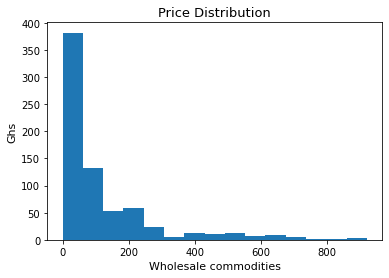

In [27]:
# PLotting histogram of Prices
plt.hist(commodities['PRICE, ¢ GH'], bins = 15)
plt.title('Price Distribution', fontsize=13)
plt.xlabel('Wholesale commodities', fontsize=11)
plt.ylabel('Ghs', fontsize=11)
plt.show()

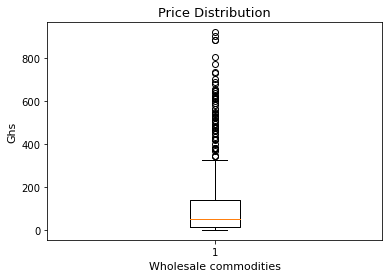

In [28]:
# PLotting boxplot of Prices
plt.boxplot(commodities['PRICE, ¢ GH'])
plt.title('Price Distribution', fontsize=13)
plt.xlabel('Wholesale commodities', fontsize=11)
plt.ylabel('Ghs', fontsize=11)
plt.show()

# weight analysis

In [29]:
commodities['WEIGHT, KG PER BAG'].value_counts()

100    240
93     120
109    120
250    120
91     120
Name: WEIGHT, KG PER BAG, dtype: int64

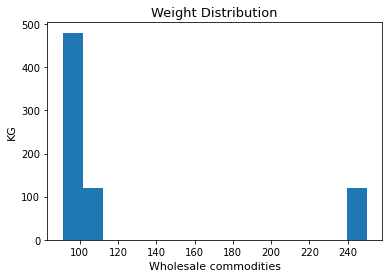

In [30]:
# PLotting histogram of WEIGHT
plt.hist(commodities['WEIGHT, KG PER BAG'], bins = 15)
plt.title('Weight Distribution', fontsize=13)
plt.xlabel('Wholesale commodities', fontsize=11)
plt.ylabel('KG', fontsize=11)
plt.show()

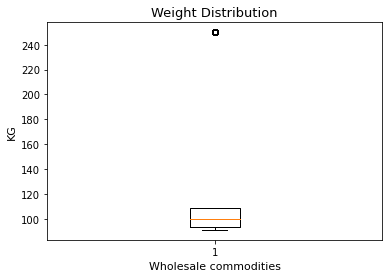

In [31]:
# PLotting Boxplot of WEIGHT
plt.boxplot(commodities['WEIGHT, KG PER BAG'])
plt.title('Weight Distribution', fontsize=13)
plt.xlabel('Wholesale commodities', fontsize=11)
plt.ylabel('KG', fontsize=11)
plt.show()

# MULTIVARIATE ANALYSIS

In [32]:
commodities.groupby(['YEAR'])[['COMMODITY','PRICE, ¢ GH']].max()

,COMMODITY,"PRICE, ¢ GH"
YEAR,,
2008,YAM,689.87
2009,YAM,920.55
2010,YAM,884.20
2011,YAM,202.10
2012,YAM,280.46
2013,YAM,297.40
2014,YAM,344.45
2015,YAM,378.35
2016,YAM,524.89


In [33]:
commodities.groupby(['YEAR'])[['COMMODITY','PRICE, ¢ GH']].min()

,COMMODITY,"PRICE, ¢ GH"
YEAR,,
2008,COCOYAM,0.131
2009,COCOYAM,3.317
2010,COCOYAM,4.382
2011,COCOYAM,0.007
2012,COCOYAM,0.010
2013,COCOYAM,0.008
2014,COCOYAM,0.010
2015,COCOYAM,0.010
2016,COCOYAM,0.010


From the above analysis, we can see that Yam had the highest prices over the years and Cocoyam had the lowest prices over the years

In [34]:
commodities.groupby(['YEAR'])[['MONTH','PRICE, ¢ GH']].max()

,MONTH,"PRICE, ¢ GH"
YEAR,,
2008,SEPTEMBER,689.87
2009,SEPTEMBER,920.55
2010,SEPTEMBER,884.20
2011,SEPTEMBER,202.10
2012,SEPTEMBER,280.46
2013,SEPTEMBER,297.40
2014,SEPTEMBER,344.45
2015,SEPTEMBER,378.35
2016,SEPTEMBER,524.89


In [35]:
commodities.groupby(['YEAR'])[['MONTH','PRICE, ¢ GH']].min()

,MONTH,"PRICE, ¢ GH"
YEAR,,
2008,APRIL,0.131
2009,APRIL,3.317
2010,APRIL,4.382
2011,APRIL,0.007
2012,APRIL,0.010
2013,APRIL,0.008
2014,APRIL,0.010
2015,APRIL,0.010
2016,APRIL,0.010


September was the month with the highest prices  and April was the month with the lowest prices

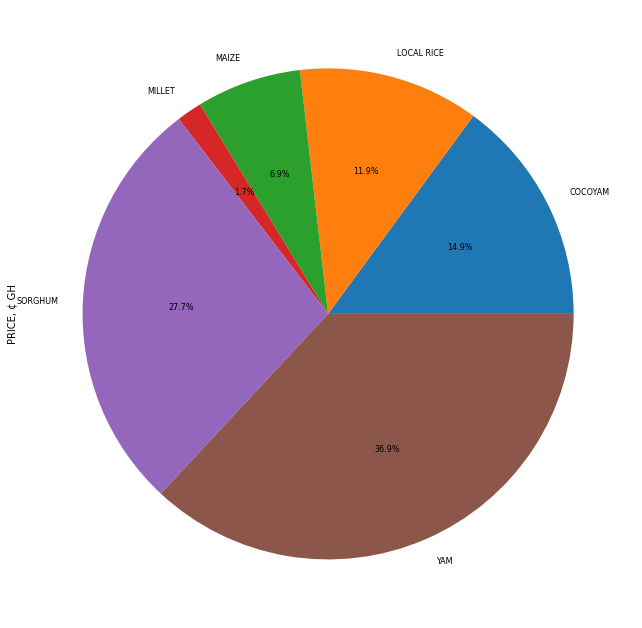

In [8]:
commodities.groupby('COMMODITY')['PRICE, ¢ GH'].sum().plot(kind= 'pie', figsize =(11,15), fontsize = 8, autopct= '%1.1f%%')
plt.show()

From the distribution, Yam had the highest price amongst the commodities and Millet had the lowest price.

In [9]:
commodities.corr()

,YEAR,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
YEAR,1.000000e+00,1.103780e-13,0.053873
"WEIGHT, KG PER BAG",1.103780e-13,1.000000e+00,0.404250
"PRICE, ¢ GH",5.387296e-02,4.042497e-01,1.000000



all columns have a high correlation except YEAR
